<a href="https://colab.research.google.com/github/Bhagath2005/B26_PFDS_1807/blob/main/LAB2_B26_1807.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {
    'Order_ID': [101, 102, 103, 104, 105, 106],
    'Product': ['Laptop', 'Mobile', 'Tablet', 'Laptop', 'Headphones', 'Mobile'],
    'Quantity': [1, 2, 3, 1, 5, 4],
    'Price': [80000, 15000, 12000, 85000, 2000, 14000]
}

df = pd.DataFrame(data)
print("\nInitial DataFrame:")
print(df)

df['Total_Sale'] = df['Quantity'] * df['Price']
print("\nDataFrame with Total Sale:")
print(df)

high_value_orders = df[df['Total_Sale'] > 1000]
print("\nOrders with Total Sale > 1000:")
print(high_value_orders)

most_sold = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("\nMost Sold Products:")
print(most_sold)

def discount(amount):
    if amount > 50000:
        return amount * 0.10
    elif amount > 20000:
        return amount * 0.05
    else:
        return amount * 0.02

df['Discount'] = df['Total_Sale'].apply(discount)
print("\nDataFrame with Discount:")
print(df)

summary_file = "sales_summary.xlsx"
df.to_excel(summary_file, index=False)
print(f"\nSummary exported to {summary_file}")



Initial DataFrame:
   Order_ID     Product  Quantity  Price
0       101      Laptop         1  80000
1       102      Mobile         2  15000
2       103      Tablet         3  12000
3       104      Laptop         1  85000
4       105  Headphones         5   2000
5       106      Mobile         4  14000

DataFrame with Total Sale:
   Order_ID     Product  Quantity  Price  Total_Sale
0       101      Laptop         1  80000       80000
1       102      Mobile         2  15000       30000
2       103      Tablet         3  12000       36000
3       104      Laptop         1  85000       85000
4       105  Headphones         5   2000       10000
5       106      Mobile         4  14000       56000

Orders with Total Sale > 1000:
   Order_ID     Product  Quantity  Price  Total_Sale
0       101      Laptop         1  80000       80000
1       102      Mobile         2  15000       30000
2       103      Tablet         3  12000       36000
3       104      Laptop         1  85000       850


Merged Data:
    Department  Budget  Actual  Variance
2          IT  120000  130000     10000
3   Marketing   60000   65000      5000
0          HR   50000   52000      2000
4  Operations   90000   88000     -2000
1     Finance   75000   70000     -5000

Exceeding Budget:
   Department  Budget  Actual  Variance
0         HR   50000   52000      2000
2         IT  120000  130000     10000
3  Marketing   60000   65000      5000


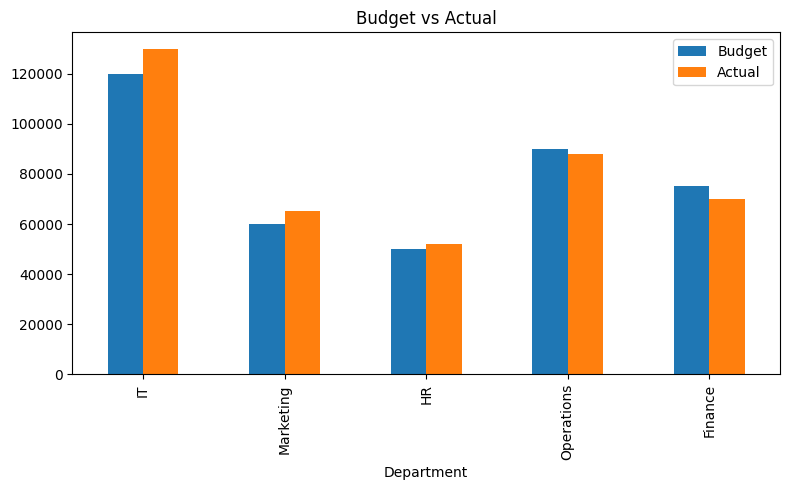

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

budget = pd.DataFrame({'Department': ['HR','Finance','IT','Marketing','Operations'],
                        'Budget':[50000,75000,120000,60000,90000]})
actual = pd.DataFrame({'Department': ['HR','Finance','IT','Marketing','Operations'],
                        'Actual':[52000,70000,130000,65000,88000]})

df = budget.merge(actual, on='Department')
df['Variance'] = df['Actual'] - df['Budget']

exceed = df[df['Variance'] > 0]
df = df.sort_values('Variance', ascending=False)

print("\nMerged Data:\n", df)
print("\nExceeding Budget:\n", exceed)

df.plot(x='Department', y=['Budget','Actual'], kind='bar', figsize=(8,5), title='Budget vs Actual')
plt.tight_layout(); plt.show()
